### Load the dataset

In [2]:
from keras.datasets import mnist

/home/rahul/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


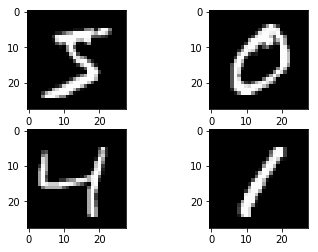

In [5]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

# Trial with a simple neural network with a single hidden layer.
### A multi-layer perceptron model

In [6]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

- Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. The effect is that the network becomes less sensitive to the specific weights of neurons. This in turn results in a network that is capable of better generalization and is less likely to overfit the training data.

In [7]:
#initialize random seed to a constant for reproducibility
seed = 7
numpy.random.seed(seed)

In [8]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
#reshape to 60k vectors of size 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [12]:
#normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [13]:
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
y_test.shape

(10000, 10)

In [15]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal',activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

- The model is a simple neural network with one hidden layer.
- Rectifier activation function is used for the neurons in the hidden layer.
- Softmax activation used on the output layer to turn the outputs into probability like values.
- Logarithmic loss used as loss function.
- Adam gradient descent algorithm used to learn the weights.

In [16]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
#verbose reduces the printing output to one line for each epoch

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2782 - acc: 0.9211 - val_loss: 0.1409 - val_acc: 0.9576
Epoch 2/10
 - 7s - loss: 0.1116 - acc: 0.9678 - val_loss: 0.0925 - val_acc: 0.9710
Epoch 3/10
 - 7s - loss: 0.0719 - acc: 0.9795 - val_loss: 0.0784 - val_acc: 0.9773
Epoch 4/10
 - 7s - loss: 0.0505 - acc: 0.9858 - val_loss: 0.0744 - val_acc: 0.9773
Epoch 5/10
 - 7s - loss: 0.0375 - acc: 0.9893 - val_loss: 0.0674 - val_acc: 0.9796
Epoch 6/10
 - 8s - loss: 0.0269 - acc: 0.9928 - val_loss: 0.0622 - val_acc: 0.9809
Epoch 7/10
 - 8s - loss: 0.0212 - acc: 0.9945 - val_loss: 0.0621 - val_acc: 0.9809
Epoch 8/10
 - 8s - loss: 0.0143 - acc: 0.9968 - val_loss: 0.0630 - val_acc: 0.9798
Epoch 9/10
 - 7s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0580 - val_acc: 0.9818
Epoch 10/10
 - 9s - loss: 0.0081 - acc: 0.9986 - val_loss: 0.0594 - val_acc: 0.9816


In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline error: %.2f%%"%(100-scores[1]*100))

Baseline error: 1.84%


# Simple CNN for MNIST

In [19]:
import numpy
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

In [21]:
seed = 7
numpy.random.seed(seed)

In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [25]:
X_train[0].shape

(1, 28, 28)

In [26]:
#normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

- The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
- Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
- The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
- Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
- Next a fully connected layer with 128 neurons and rectifier activation function.
- Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [27]:
def baseline_model():
    model = Sequential()
    
    model.add(Conv2D(32, (5,5), input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [30]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.2424 - acc: 0.9311 - val_loss: 0.0713 - val_acc: 0.9798
Epoch 2/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0706 - acc: 0.9792 - val_loss: 0.0536 - val_acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0518 - acc: 0.9838 - val_loss: 0.0408 - val_acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0387 - val_acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0334 - acc: 0.9897 - val_loss: 0.0378 - val_acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0265 - acc: 0.9914 - val_loss: 0.0342 - val_acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0343 - 

In [31]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN error: %.2f%%"%(100-scores[1]*100))

CNN error: 1.01%


In [32]:
scores

[0.030895663881623476, 0.9899]

# TRY

- Convolutional layer with 30 feature maps of size 5×5.
- Pooling layer taking the max over 2*2 patches.
- Convolutional layer with 15 feature maps of size 3×3.
- Pooling layer taking the max over 2*2 patches.
- Dropout layer with a probability of 20%.
- Flatten layer.
- Fully connected layer with 128 neurons and rectifier activation.
- Fully connected layer with 50 neurons and rectifier activation.
- Output layer.